In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import glob 

import cartopy.crs as ccrs
import cartopy
sns.set_context("notebook")

In [13]:
machine = "levante"

machine_dict = {"levante" : 
                {"temp_dir" : "/scratch/b/b381935/scenic_ICON/",
                "out_dir" : "/work/bb1343/crop/scenic_data/climate/",
                "hs_dir" : "/work/bb1343/crop/scenic_heatstress/HI_final/",
                "plot_dir": "/home/b/b381935/scenic_heatstress/Plots/"},
                
                "owl": 
                {"temp_dir" : "/bg/data/biogeo/users/martin-l/projects/scenic/preprocessing/climate/",
               "out_dir": "/bg/data/biogeo/users/martin-l/projects/scenic/preprocessing/climate/",
                "hs_dir": "/bg/data/biogeo/users/martin-l/projects/scenic/scenic_heatstress/HI_final/",
                "plot_dir": "/bg/data/biogeo/users/martin-l/projects/scenic/scenic_heatstress/Plots/"}
               }

out_dir = machine_dict[machine]["hs_dir"]
clim_dir = machine_dict[machine]["out_dir"]
plot_dir = machine_dict[machine]["plot_dir"]

deg_list = ["2018-2022"]*6 + ["+2K"]*6 + ["+3K"] *6 + ["+4K"]*6
year_list =["ggcmi"]*6 + [2038, 2039, 2040, 2041, 2042, 2043] +[2065, 2066, 2067, 2068, 2069, 2070] +[2093, 2094, 2095, 2096, 2097, 2098]

deg_list = [""] + ["+2K"] + ["+3K"] + ["+4K"]
f_list = ["f2017", "f2038","f2065","f2093"]



name_dict = dict(zip(f_list,deg_list)) 

In [3]:
name_dict

{'f2017': '', 'f2038': '+2K', 'f2065': '+3K', 'f2093': '+4K'}

# Ensemble Spread for ICON TMAX

In [22]:
forcing = "f2093"

ICON_files = []
for member in ["E1","E2","E3","E4","E5"]:
    file = f'{clim_dir}scenic_EU025/{member}_scenic_EU025_ssp370_{forcing}_daily.nc'
    ICON_files.append(file)
ICON_datasets = [xr.open_dataset(f) for f in ICON_files]
ICON_data = xr.concat([ds['tmax'] for ds in ICON_datasets],dim = "member")
#data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
ICON_data = ICON_data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
ICON_data = ICON_data.where(ICON_data > 0)

In [23]:
ICON_data

<xarray.DataArray 'tmax' (member: 5, date: 2162, lat: 133, lon: 168)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -10.38 -10.12 -9.875 -9.625 ... 30.88 31.12 31.38
  * lat      (lat) float64 34.88 35.12 35.38 35.62 ... 67.12 67.38 67.62 67.88
  * date     (date) datetime64[ns] 2093-01-01 2093-02-01 ... 2099-01-01
  * member   (member) <U2 'E1' 'E2' 'E3' 'E4' 'E5'
Attributes:
    units:               °C
    aggregation_method:  max

In [67]:
#simple, for maize (or spring/winter wheat individually): 

forcing = "f2093"
crop = "maize"

files = []
for member in ["","E2","E3","E4","E5"]:
#for member in ["","E2","E3","E4","E5"]:
    if member != "": 
        member = member + "_"
    file = f'{out_dir}ggcmi_planting/{member}scenic_EU025_{forcing}_HI_{crop}_rf.nc'
    files.append(file)

datasets = [xr.open_dataset(f) for f in files]
data = xr.concat([ds['HI'] for ds in datasets],dim = "member")
#data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
data = data.where(data > 0)

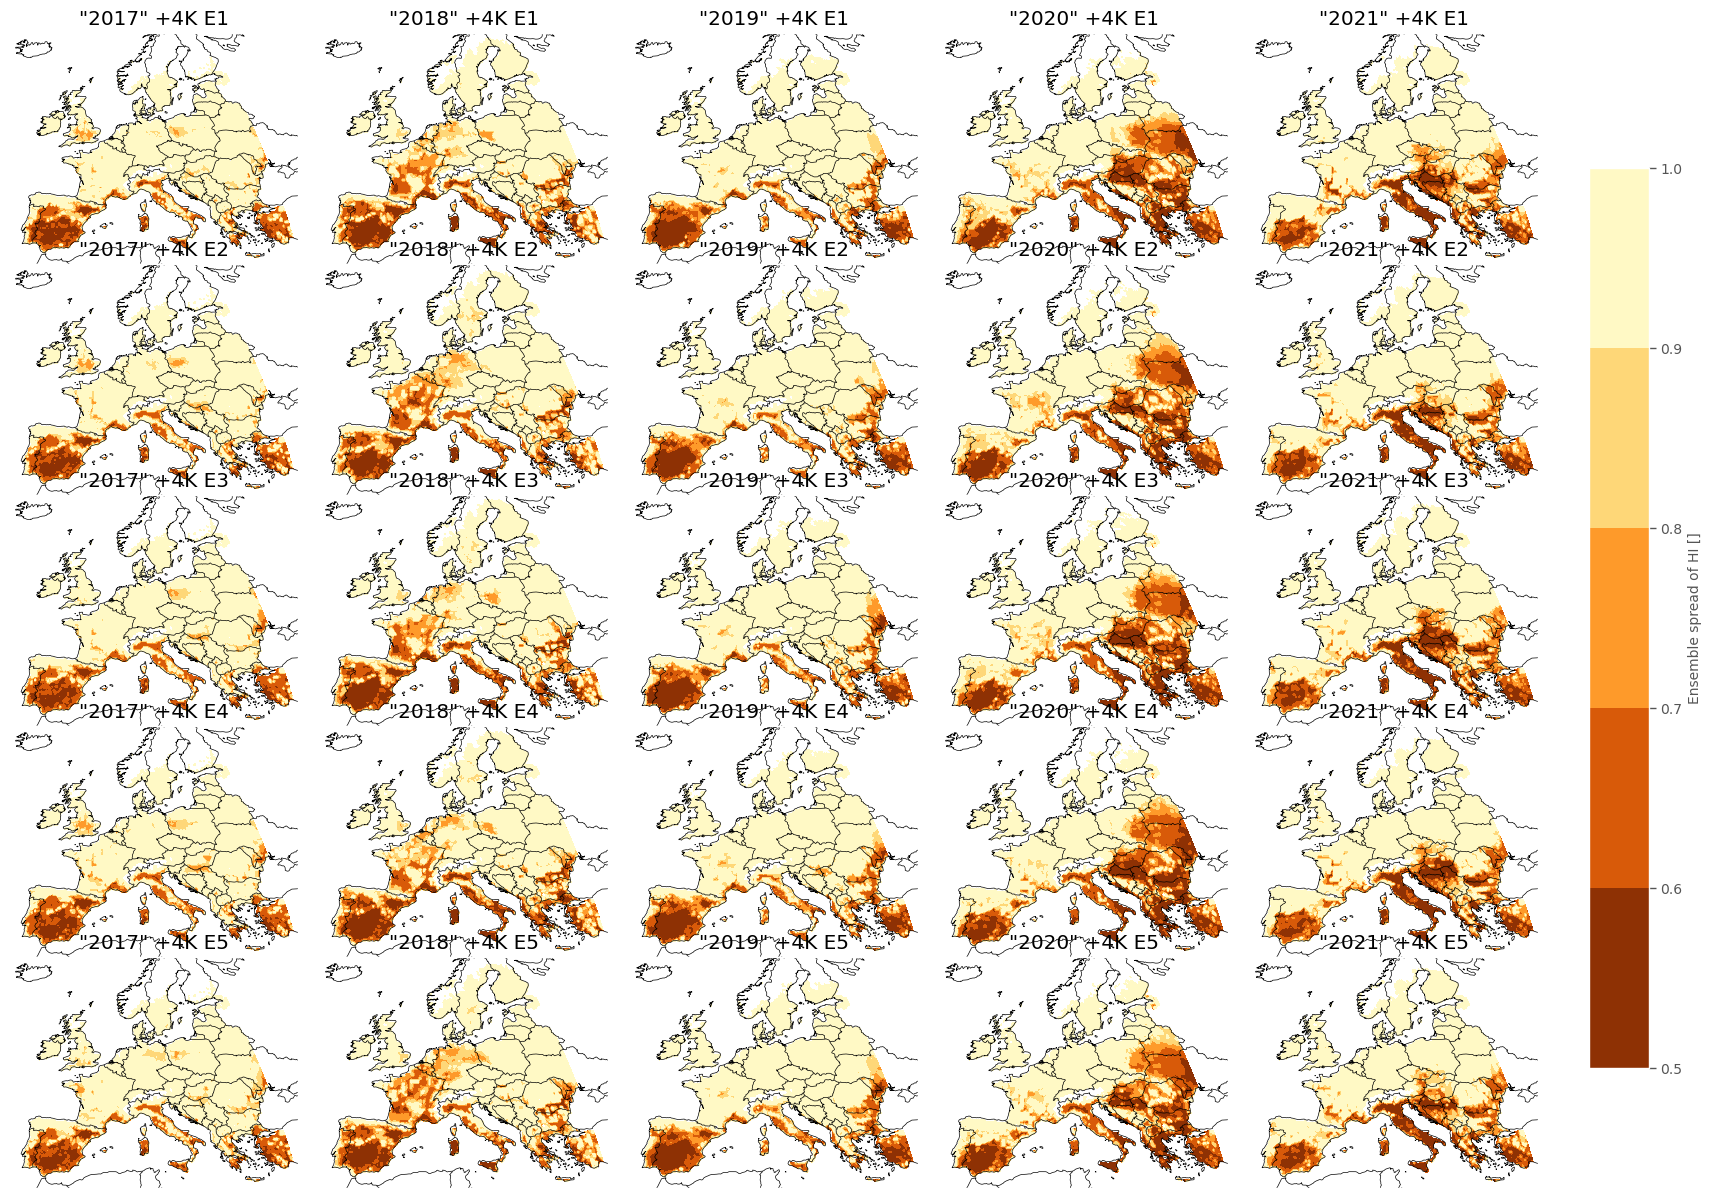

In [77]:
sns.set_context("paper")
fig, axs = plt.subplots( ncols = 5,nrows=5,figsize=(20,15),subplot_kw={"projection": ccrs.Orthographic(5,15)})
plt.subplots_adjust(wspace=0, hspace=0)
levels = np.linspace(-0.45,0.45,10)#np.linspace(-0.45,0.45,11)
#norm = CenteredNorm()
plt.style.use("ggplot")

s = int(forcing.replace("f",""))

cmap = sns.color_palette("light:#5A9", as_cmap=True)
for m in np.arange(0,5):
    
    for i,y in enumerate(np.arange(s+1,s+6)):
        #print(i)
        ax = axs[m,i]
        data_y = data.isel(member = m).sel(year = y)
        plot = ax.contourf(data_y.lon,data_y.lat,data_y,transform=ccrs.PlateCarree(),cmap='YlOrBr_r',levels = np.linspace(0.5,1,6)) ##,,levels = np.linspace(0,0.2,11)
        ax.coastlines();
        ax.set_facecolor("white")
        ax.add_feature(cartopy.feature.BORDERS)
        if forcing == "f2017":
            ax.set_title(f'{i + 2017} ')
        else: ax.set_title(f'"{i + 2017}" {name_dict[forcing]} E{m+1}') 

cbar_ax = fig.add_axes([0.92, 0.19, 0.03, 0.6]) #4-tuple of floats rect = [left, bottom, width, height]
cbar = fig.colorbar(plot,cax=cbar_ax,pad=0.1)
cbar.set_label('Ensemble spread of HI []',  rotation=90,fontsize=10)
cbar.ax.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0, hspace=0)

# Ensemble Spread for HI Data

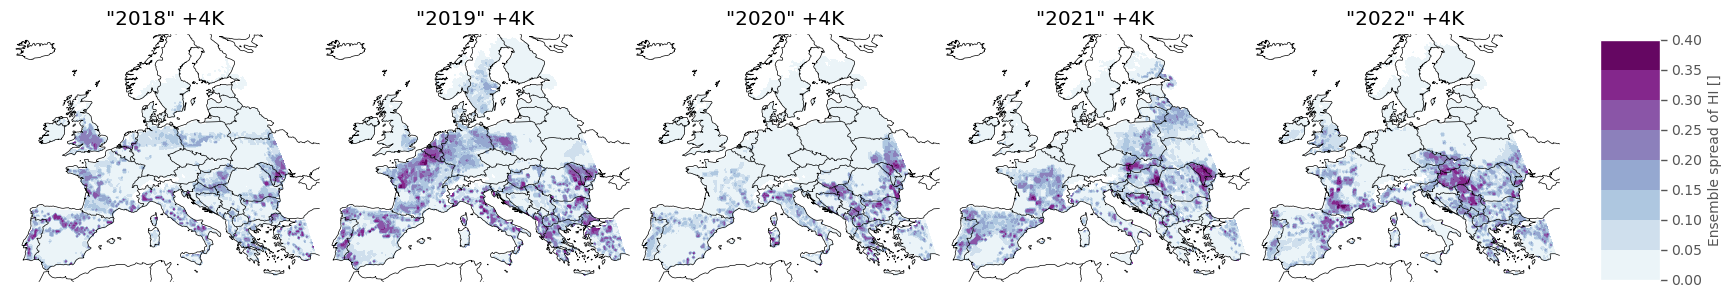

In [ ]:
range_data = data.max(dim="member") - data.min(dim="member")
data_p = range_data.isel(year=slice(1,6))#.std(dim="member")
sns.set_context("paper")
fig, axs = plt.subplots( ncols = 5, figsize=(20,4),subplot_kw={"projection": ccrs.Orthographic(5,15)})
plt.subplots_adjust(wspace=0, hspace=0)
levels = np.linspace(-0.45,0.45,10)#np.linspace(-0.45,0.45,11)
#norm = CenteredNorm()
plt.style.use("ggplot")

cmap = sns.color_palette("light:#5A9", as_cmap=True)

for ax,y in zip(axs.flat,np.arange(0,6)):
    data_y = data_p.isel(year = y)
    plot = ax.contourf(data_y.lon,data_y.lat,data_y,transform=ccrs.PlateCarree(),cmap='BuPu',levels = np.linspace(0,0.4,9)) ##,,levels = np.linspace(0,0.2,11)
    ax.coastlines();
    ax.set_facecolor("white")
    ax.add_feature(cartopy.feature.BORDERS)
    if forcing == "f2017":
        ax.set_title(f'{y + 2018}')
    else: ax.set_title(f'"{y + 2018}" {name_dict[forcing]}') 

cbar_ax = fig.add_axes([0.92, 0.19, 0.03, 0.6]) #4-tuple of floats rect = [left, bottom, width, height]
cbar = fig.colorbar(plot,cax=cbar_ax,pad=0.1)
cbar.set_label('Ensemble spread of HI []',  rotation=90,fontsize=10)
cbar.ax.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}_{forcing}.png",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}_{forcing}.pdf",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/paper/A5_{forcing}_{crop}.eps",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/paper/A5_ensemble_spread_{crop}_{forcing}.png",dpi=300,bbox_inches='tight');

In [103]:
[print(i) for i in np.arange(0,6)]

0
1
2
3
4
5


[None, None, None, None, None, None]

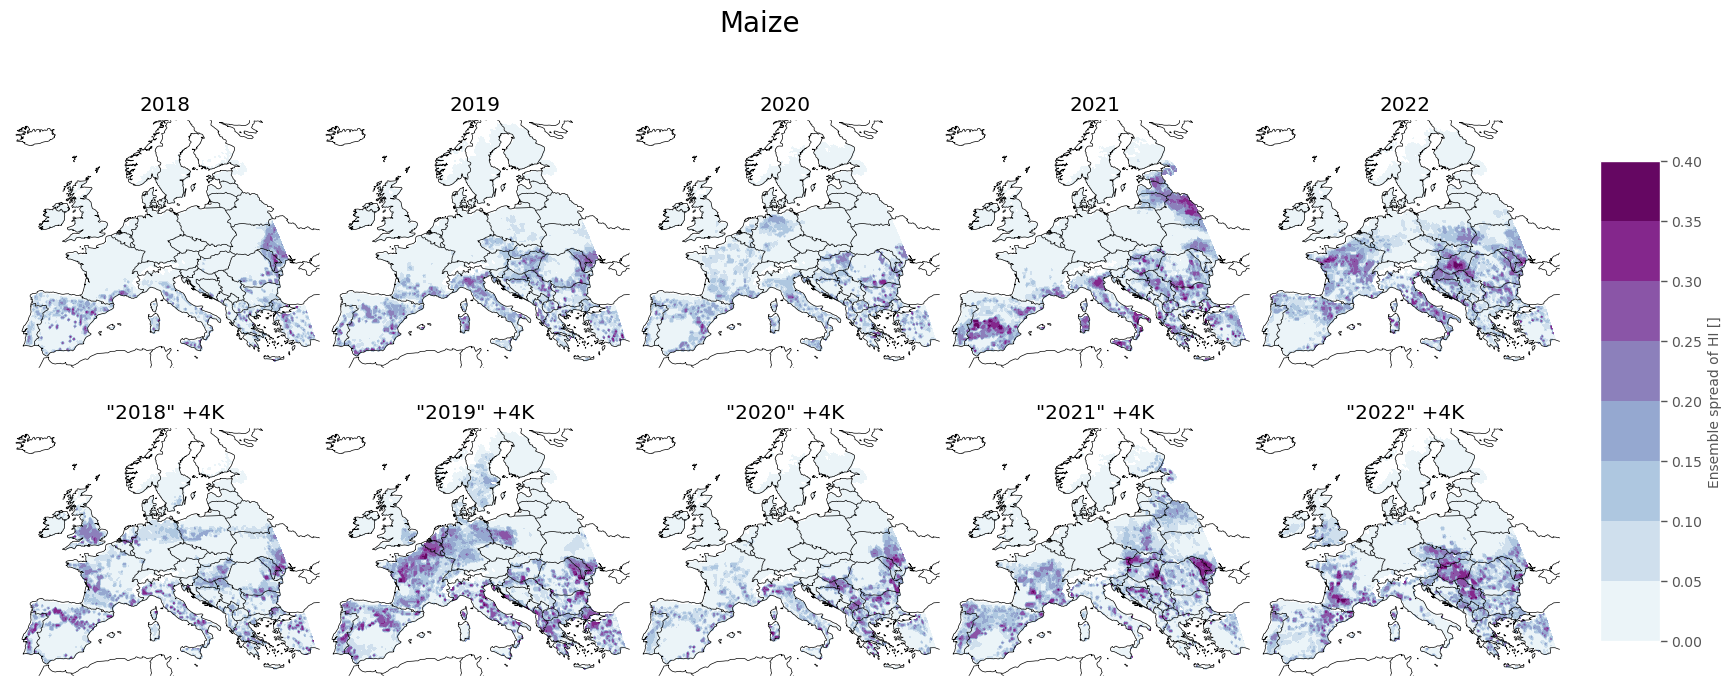

In [9]:
#simple, for maize (or spring/winter wheat individually): 

crop = "maize"

sns.set_context("paper")
fig, axs = plt.subplots( ncols = 5,nrows=2, figsize=(20,8),subplot_kw={"projection": ccrs.Orthographic(5,15)})
plt.subplots_adjust(wspace=0, hspace=0)
plt.style.use("ggplot")

for f,forcing in enumerate(["f2017","f2093"]):
    files = []
    for member in ["","E2","E3","E4","E5"]:
    #for member in ["","E2","E3","E4","E5"]:
        if member != "": 
            member = member + "_"
        file = f'{out_dir}ggcmi_planting/{member}scenic_EU025_{forcing}_HI_{crop}_rf.nc'
        files.append(file)
        
    datasets = [xr.open_dataset(f) for f in files]
    data = xr.concat([ds['HI'] for ds in datasets],dim = "member")
    #data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
    data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
    data = data.where(data > 0)
    range_data = data.max(dim="member") - data.min(dim="member")
   
    for y in np.arange(1,6):
        ax = axs[f,y-1]
        data_y = range_data.isel(year = y)
        plot = ax.contourf(data_y.lon,data_y.lat,data_y,transform=ccrs.PlateCarree(),cmap='BuPu',levels = np.linspace(0,0.4,9)) ##,,levels = np.linspace(0,0.2,11)
        ax.coastlines();
        ax.set_facecolor("white")
        ax.add_feature(cartopy.feature.BORDERS)
        if forcing == "f2017":
            ax.set_title(f'{y + 2017}')
        else: ax.set_title(f'"{y + 2017}" {name_dict[forcing]}') 

cbar_ax = fig.add_axes([0.92, 0.19, 0.03, 0.6]) #4-tuple of floats rect = [left, bottom, width, height]
cbar = fig.colorbar(plot,cax=cbar_ax,pad=0.1)
cbar.set_label('Ensemble spread of HI []',  rotation=90,fontsize=10)
cbar.ax.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0, hspace=0)

if crop == "maize":
    plt.savefig(f"{plot_dir}/paper/A4.eps",dpi=300,bbox_inches='tight');
    plt.savefig(f"{plot_dir}/paper/A4_ensemble_spread_{crop}.png",dpi=300,bbox_inches='tight');

plt.suptitle(f"{crop.capitalize()}",fontsize=20)
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}.png",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}.pdf",dpi=300,bbox_inches='tight');

In [8]:
crop.capitalize()

'Maize'

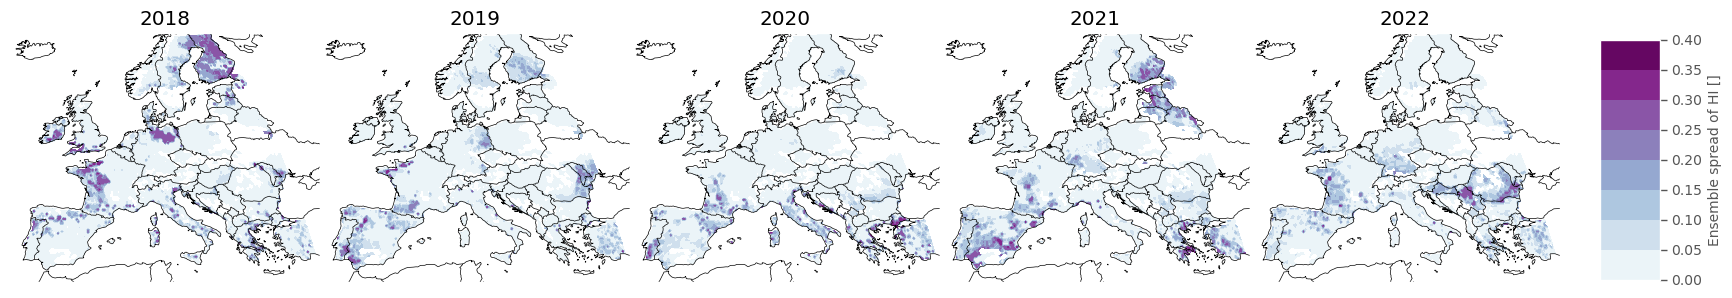

In [115]:
# for combining spring & winter wheat 
#include suitability
forcing = "f2017"
wheat = []
for crop in ["spring_wheat", "winter_wheat"]:
    files = []
    for member in ["","E2","E3","E4","E5"]:
    #for member in ["","E2","E3","E4","E5"]:
        if member != "": 
            member = member + "_"
        file = f'{out_dir}ggcmi_planting/{member}scenic_EU025_{forcing}_HI_{crop}_rf.nc'
        files.append(file)
        
    datasets = [xr.open_dataset(f) for f in files]
    data = xr.concat([ds['HI'] for ds in datasets],dim = "member")
    #data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
    data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
    data = data.where(data > 0)
    data["crop"] = data.attrs["crop"]
    wheat.append(data)

[s_file] = glob.glob(f"/work/bb1343/crop/scenic_heatstress/crop_areas/wwh_planting_suitability_{forcing}_025_ci07.nc")
s_mask = xr.load_dataarray(s_file)

wheat = xr.concat(wheat,dim="crop")
ww = wheat.sel(crop="winter_wheat").where((s_mask >= 2) & (s_mask <6),np.nan)
sw = wheat.sel(crop="spring_wheat").where((s_mask > 6)  | (s_mask <2),np.nan)
data = sw.combine_first(ww)
crop = "wheat"
range_data = data.max(dim="member") - data.min(dim="member")
data_p = range_data.isel(year=slice(1,6))#.std(dim="member")
sns.set_context("paper")
fig, axs = plt.subplots( ncols = 5, figsize=(20,4),subplot_kw={"projection": ccrs.Orthographic(5,15)})
plt.subplots_adjust(wspace=0, hspace=0)
levels = np.linspace(-0.45,0.45,10)#np.linspace(-0.45,0.45,11)
#norm = CenteredNorm()
plt.style.use("ggplot")

cmap = sns.color_palette("light:#5A9", as_cmap=True)

for ax,y in zip(axs.flat,np.arange(0,6)):
    data_y = data_p.isel(year = y)
    plot = ax.contourf(data_y.lon,data_y.lat,data_y,transform=ccrs.PlateCarree(),cmap='BuPu',levels = np.linspace(0,0.4,9)) ##,,levels = np.linspace(0,0.2,11)
    ax.coastlines();
    ax.set_facecolor("white")
    ax.add_feature(cartopy.feature.BORDERS)
    if forcing == "f2017":
        ax.set_title(f'{y + 2018}')
    else: ax.set_title(f'"{y + 2018}" {name_dict[forcing]}') 

cbar_ax = fig.add_axes([0.92, 0.19, 0.03, 0.6]) #4-tuple of floats rect = [left, bottom, width, height]
cbar = fig.colorbar(plot,cax=cbar_ax,pad=0.1)
cbar.set_label('Ensemble spread of HI []',  rotation=90,fontsize=10)
cbar.ax.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}_{forcing}.png",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}_{forcing}.pdf",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/paper/A5_{forcing}_{crop}.eps",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/paper/A5_ensemble_spread_{crop}_{forcing}.png",dpi=300,bbox_inches='tight');

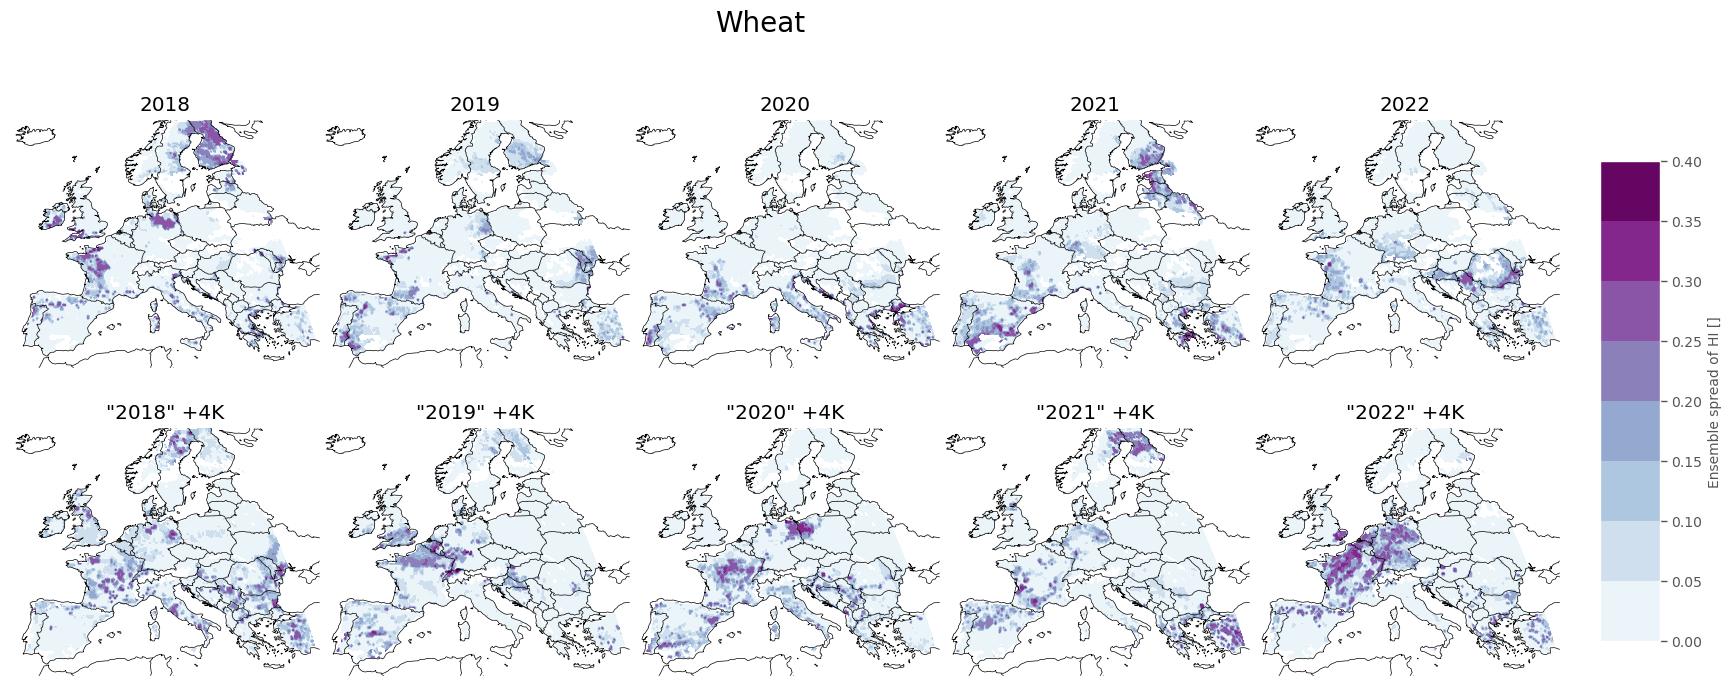

In [10]:
# for combining spring & winter wheat 

sns.set_context("paper")
fig, axs = plt.subplots( ncols = 5,nrows=2, figsize=(20,8),subplot_kw={"projection": ccrs.Orthographic(5,15)})
plt.subplots_adjust(wspace=0, hspace=0)
plt.style.use("ggplot")


for f,forcing in enumerate(["f2017","f2093"]):
    wheat = []
    for crop in ["spring_wheat", "winter_wheat"]:
        files = []
        for member in ["","E2","E3","E4","E5"]:
        #for member in ["","E2","E3","E4","E5"]:
            if member != "": 
                member = member + "_"
            file = f'{out_dir}ggcmi_planting/{member}scenic_EU025_{forcing}_HI_{crop}_rf.nc'
            files.append(file)
            
        datasets = [xr.open_dataset(f) for f in files]
        data = xr.concat([ds['HI'] for ds in datasets],dim = "member")
        #data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
        data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
        data = data.where(data > 0)
        data["crop"] = data.attrs["crop"]
        wheat.append(data)

    [s_file] = glob.glob(f"/work/bb1343/crop/scenic_heatstress/crop_areas/wwh_planting_suitability_{forcing}_025_ci07.nc")
    s_mask = xr.load_dataarray(s_file)

    wheat = xr.concat(wheat,dim="crop")
    ww = wheat.sel(crop="winter_wheat").where((s_mask >= 2) & (s_mask <6),np.nan)
    sw = wheat.sel(crop="spring_wheat").where((s_mask > 6)  | (s_mask <2),np.nan)
    data = sw.combine_first(ww)
    crop = "wheat"
    range_data = data.max(dim="member") - data.min(dim="member")
    
    for y in np.arange(1,6):
        ax = axs[f,y-1]
        data_y = range_data.isel(year = y)
        plot = ax.contourf(data_y.lon,data_y.lat,data_y,transform=ccrs.PlateCarree(),cmap='BuPu',levels = np.linspace(0,0.4,9)) ##,,levels = np.linspace(0,0.2,11)
        ax.coastlines();
        ax.set_facecolor("white")
        ax.add_feature(cartopy.feature.BORDERS)
        if forcing == "f2017":
            ax.set_title(f'{y + 2017}')
        else: ax.set_title(f'"{y + 2017}" {name_dict[forcing]}') 

cbar_ax = fig.add_axes([0.92, 0.19, 0.03, 0.6]) #4-tuple of floats rect = [left, bottom, width, height]
cbar = fig.colorbar(plot,cax=cbar_ax,pad=0.1)
cbar.set_label('Ensemble spread of HI []',  rotation=90,fontsize=10)
cbar.ax.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig(f"{plot_dir}/paper/A2.eps",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/paper/A2_ensemble_spread_{crop}.png",dpi=300,bbox_inches='tight');

plt.suptitle(f"{crop.capitalize()}",fontsize=20)
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}.png",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/ensemble/ensemble_spread_{crop}.pdf",dpi=300,bbox_inches='tight');

# Statistical Tests

In [26]:
def mannwhit_spatial_yearly(data,year):
    data_year = data.sel(year = year)
    # Apply Mann-Whitney U test across ensemble pairs for each lat/lon
    lat = data['lat']
    lon = data['lon']
    
    p_values = xr.full_like(data_year[0, :, :], np.nan, dtype=float)  # Placeholder for p-values
    p_values.rename("p Values")
    for i in range(len(lat)):
        for j in range(len(lon)):
            # Extract data for the grid point (i, j) across ensemble members
            values = data_year[:, i, j].values
            
            # comparisons
            if not np.all(np.isnan(values)):
                for k in range(len(files)):
                    if (not np.all(np.isnan(values[k]))) and (not np.all(np.isnan(np.delete(values,k)))):
                        u_stat, p_val = mannwhitneyu(values[k],np.delete(values,k), alternative='two-sided',nan_policy="omit")
                
                        # Store the smallest p-value (or other metric)
                        if np.isnan(p_values[i, j]) or (p_val < p_values[i, j]):
                            p_values[i, j] = p_val

    
    # Mask non-significant results
    significant_mask = p_values < 0.05
    return p_values,significant_mask

In [43]:
def mannwhit_spatial_yearly2(data,year):
    data_year = data.sel(year = year)
    # Apply Mann-Whitney U test across ensemble pairs for each lat/lon
    lat = data['lat']
    lon = data['lon']
    
    p_values = xr.full_like(data_year[0, :, :], np.nan, dtype=float)  # Placeholder for p-values
    p_values.rename("p Values")
    for i in range(len(lat)):
        for j in range(len(lon)):
            # Extract data for the grid point (i, j) across ensemble members
            values = data_year[:, i, j].values
            
            # comparisons
            if not np.all(np.isnan(values)):
                for k in range(len(files)):
                    if (not np.all(np.isnan(values[k]))) and (not np.all(np.isnan(np.delete(values,k)))):
                        u_stat, p_val = mannwhitneyu(values,np.delete(values,k), alternative='two-sided',nan_policy="omit")
                
                        # Store the smallest p-value (or other metric)
                        if np.isnan(p_values[i, j]) or (p_val < p_values[i, j]):
                            p_values[i, j] = p_val
    return p_values

In [33]:
ptest = mannwhit_spatial_yearly2(data,2098)

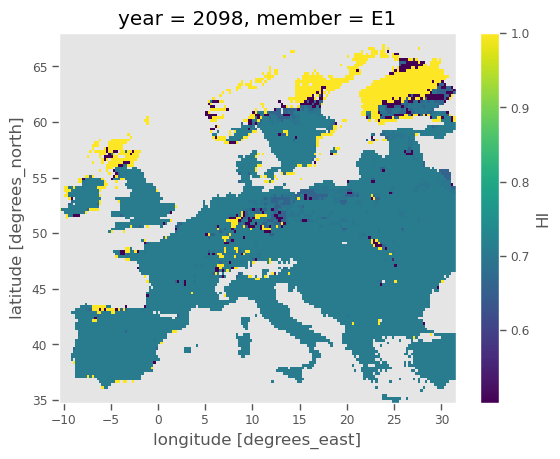

In [39]:
ptest.plot()

In [27]:
def mannwhit_spatial_all(data):
    lat = data['lat']
    lon = data['lon']
    
    p_values = xr.full_like(data[0, :, :,0], np.nan, dtype=float)  # Placeholder for p-values
    for i in range(len(lat)):
        for j in range(len(lon)):
            #print(i,j)
            # Extract data for the grid point (i, j) across ensemble members
            values = data[:, i, j].values
            
            # Pairwise comparisons
            if not np.all(np.isnan(values)):
                for k in range(len(files)):
                    for l in range(k + 1, len(files)):
                        if not np.all(np.isnan(values[k])):
                            u_stat, p_val = mannwhitneyu(values[k],np.delete(values,k), alternative='two-sided',nan_policy="omit")
                            #print(f"Pvalue { p_val}")
                            # Store the smallest p-value (or other metric)
                            if np.isnan(p_values[i, j]) or  (p_val < p_values[i, j]): #
                                p_values[i, j] = p_val
                                    
    return p_values

In [21]:
p_94,sig_94 = mannwhit_spatial_yearly(data,2094)

In [ ]:
p_94.plot()

In [ ]:
#simple, for maize (or spring/winter wheat individually): 

forcing = "f2093"
crop = "winter_wheat"

files = []
for member in ["","E2","E3","E4","E5"]:
#for member in ["","E2","E3","E4","E5"]:
    if member != "": 
        member = member + "_"
    file = f'{out_dir}ggcmi_planting/{member}scenic_EU025_{forcing}_HI_{crop}_rf.nc'
    files.append(file)

datasets = [xr.open_dataset(f) for f in files]
data = xr.concat([ds['HI'] for ds in datasets],dim = "member")
#data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
data = data.assign_coords({"member":["E1","E2","E3","E4","E5"]})
data = data.where(data > 0)

2093.0

In [44]:
ds_pvalues = []
s = int(forcing.replace("f",""))

for year in range(s+1,s+6):
    p_val_year = mannwhit_spatial_yearly2(data,year)
    ds_pvalues.append(p_val_year)
pvalues = xr.concat(ds_pvalues,dim = "year")    


In [28]:
pvalues

<xarray.DataArray 'HI' (year: 5, lat: 133, lon: 168)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lat      (lat) float64 34.88 35.12 35.38 35.62 ... 67.12 67.38 67.62 67.88
  * lon      (lon) float64 -10.38 -10.12 -9.875 -9.625 ... 30.88 31.12 31.38
  * year     (year) int64 2094 2095 2096 2097 2098
    member   <U2 'E1'
Attributes:
    t_crit_min:       32
    crop:             maize
    watering method:  rf

In [45]:
pvalues.to_netcdf(f"{out_dir}/stat/pValues_{forcing}_{crop}.nc",mode = "w")

## Plotting pvalues

In [16]:
forcing = "f2093"
crop = "maize"

In [17]:
pvalues = xr.open_dataarray(f"{out_dir}/stat/pValues_{forcing}_{crop}.nc")

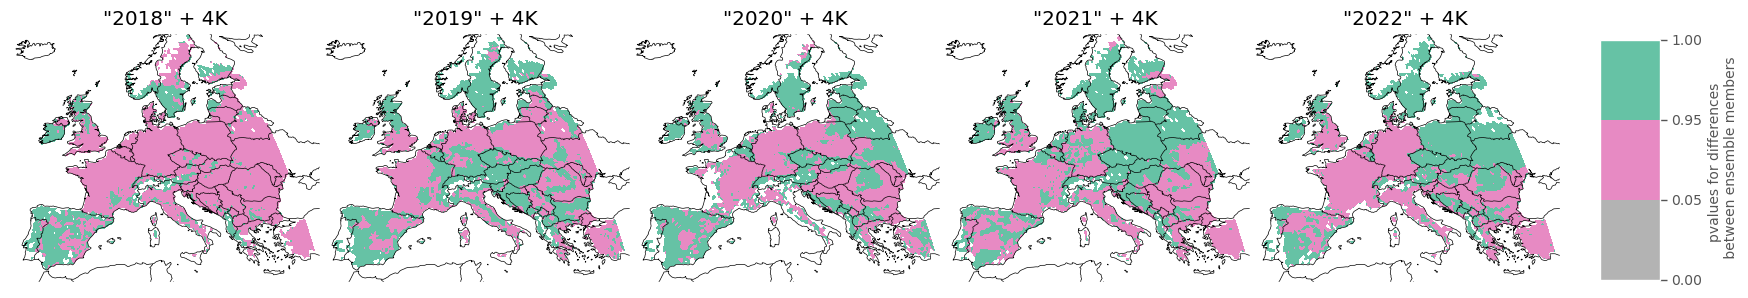

In [46]:
fig, axs = plt.subplots( ncols = 5, figsize=(20,4),subplot_kw={"projection": ccrs.Orthographic(5,15)})
plt.subplots_adjust(wspace=0, hspace=0)
levels = np.linspace(-0.45,0.45,10)#np.linspace(-0.45,0.45,11)
#norm = CenteredNorm()
plt.style.use("ggplot")

cmap = sns.color_palette("light:#5A9", as_cmap=True)

for ax,y in zip(axs.flat,np.arange(0,6)):
    data_y = pvalues.isel(year = y)
    plot = ax.contourf(data_y.lon,data_y.lat,data_y,transform=ccrs.PlateCarree(),cmap='Set2_r',levels = [0,0.05,0.95,1]) ##,,levels = np.linspace(0,0.2,11)
    ax.coastlines();
    ax.set_facecolor("white")
    ax.add_feature(cartopy.feature.BORDERS)
    ax.set_title(f'"{y + 2018}" + 4K')

cbar_ax = fig.add_axes([0.92, 0.19, 0.03, 0.6]) #4-tuple of floats rect = [left, bottom, width, height]
cbar = fig.colorbar(plot,cax=cbar_ax,pad=0.1)
cbar.set_label('pvalues for differences \n between ensemble members',  rotation=90,fontsize=10)
cbar.ax.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"{plot_dir}/ensemble/pvalues_{crop}_{forcing}.png",dpi=300,bbox_inches='tight');
plt.savefig(f"{plot_dir}/ensemble/pvalues_{crop}_{forcing}.pdf",dpi=300,bbox_inches='tight');
#plt.savefig(f"{plot_dir}/paper/A5.eps",dpi=300,bbox_inches='tight');
#plt.savefig(f"{plot_dir}/paper/A5_ensemble_spread_{crop}_{forcing}.png",dpi=300,bbox_inches='tight');

In [226]:
p_19.to_netcdf(f"{out_dir}/stat/pValues_{forcing}_{crop}_2019.nc")

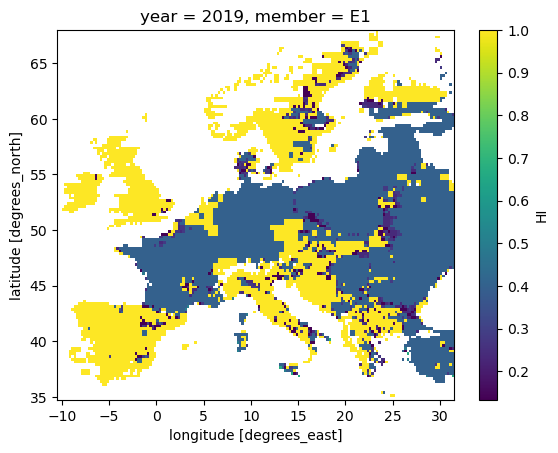

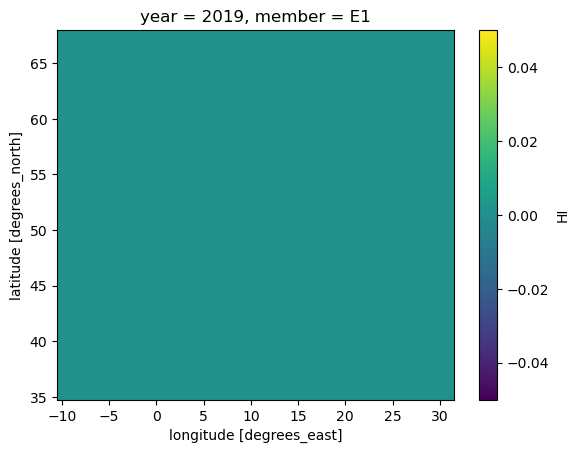

In [223]:
#p_19,sig_19 = mannwhit_spatial_yearly(data,2019)
p_19.plot();plt.show();sig_19.plot()

In [173]:
p_all, sig_all = mannwhit_spatial_all(data)

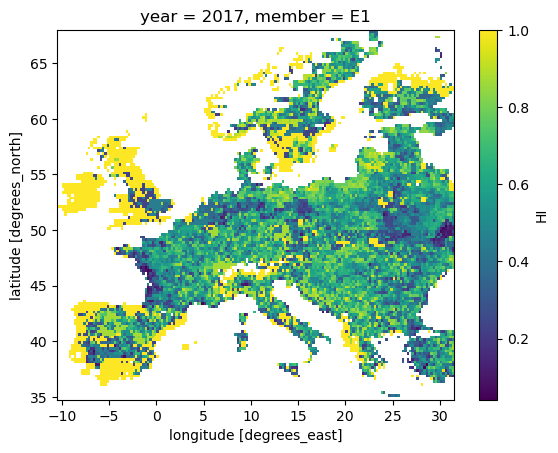

In [174]:
p_all.plot()

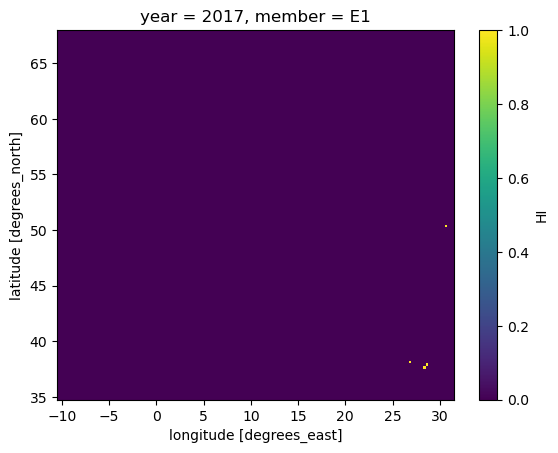

In [171]:
sig_all.plot()

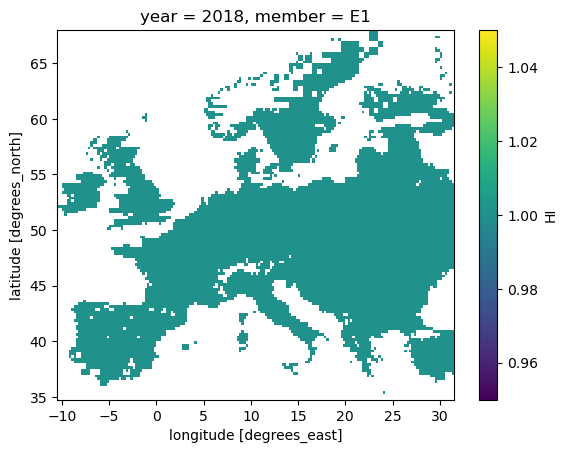

In [129]:
#p_values18, sig18 = mannwhit_spatial(data,2018)
p_values18.plot()

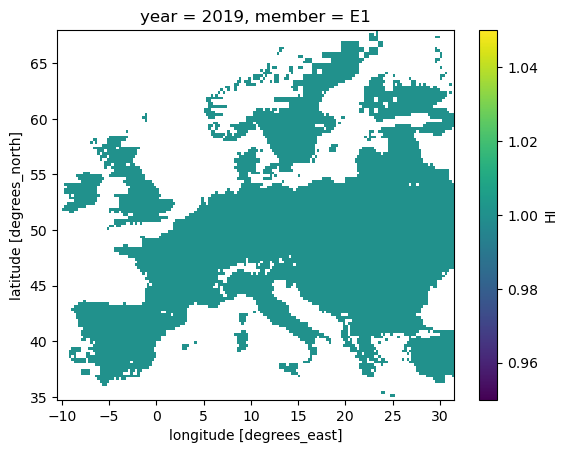

In [128]:
p_values19, sig19 = mannwhit_spatial(data,2019)
p_values19.plot()

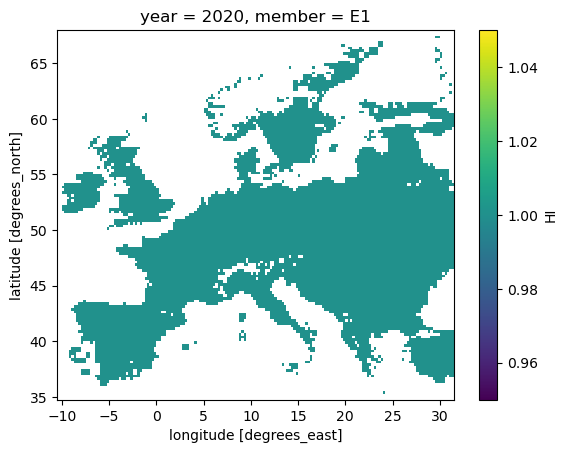

In [143]:
p_values20, sig20 = mannwhit_spatial(data,2020)
p_values20.plot()

In [123]:
p_values18 = p_values
sig18 = significant_mask

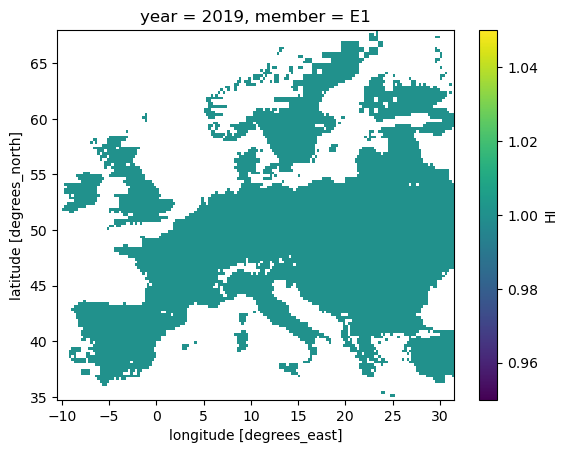

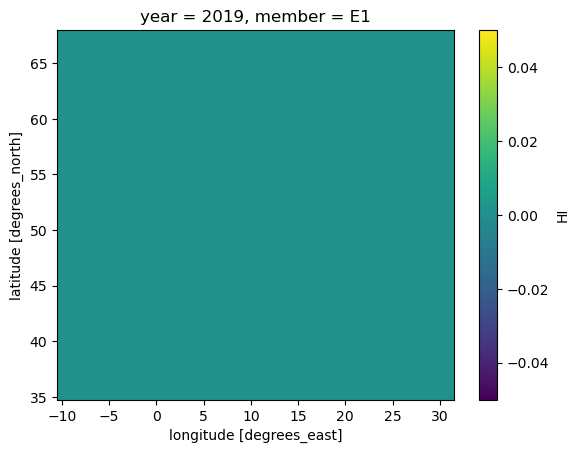

## Look at raw data 

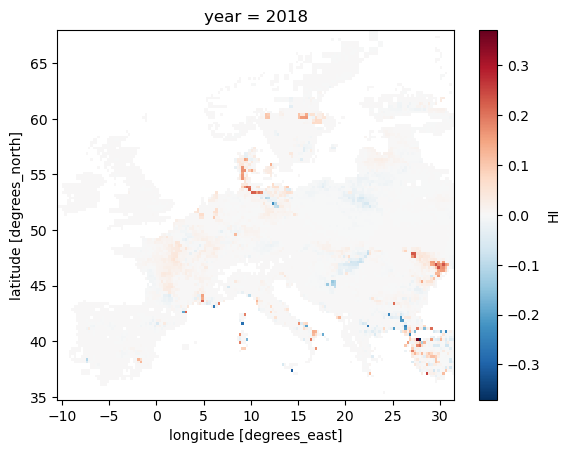

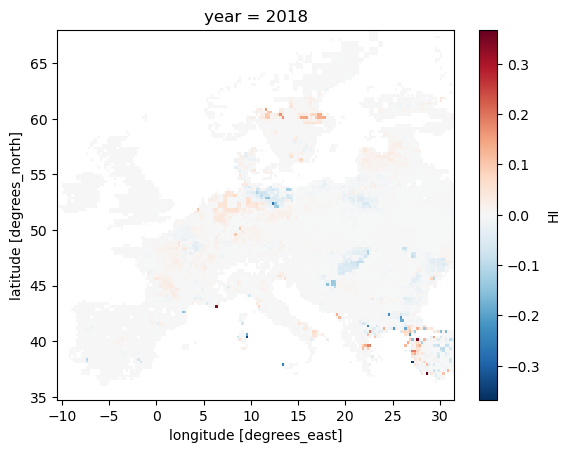

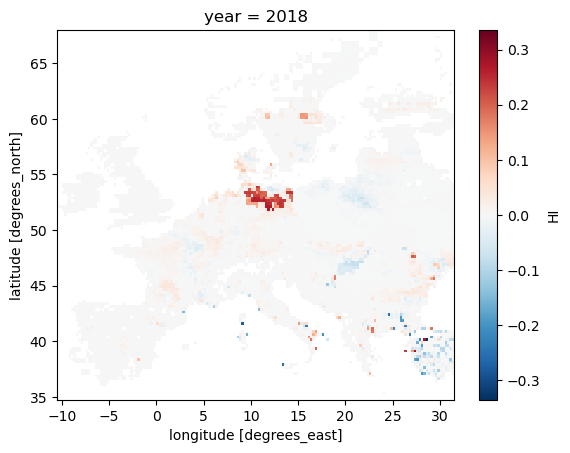

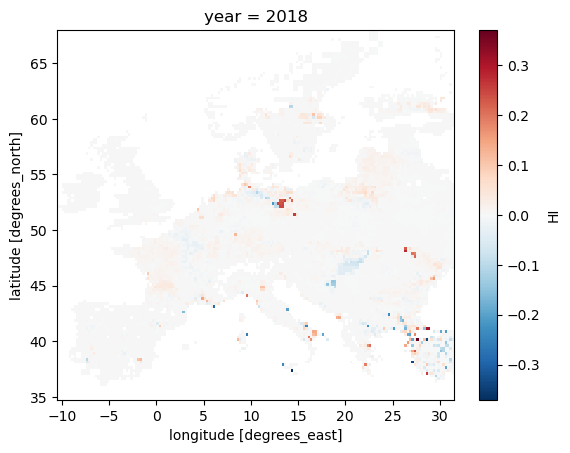

In [110]:
for E in ["E2","E3","E4","E5"]:
    (data_year.sel(member="E1") - data_year.sel(member = E)).plot(col)
    plt.show()

In [71]:
import seaborn as sns
ICON_data["year"] = ICON_data.date.dt.year
ICON_data["yday"] = ICON_data.date.dt.dayofyear
data = ICON_data.sel(lat=slice(45,55),lon=slice(5,10)).mean(dim=["lat","lon"]).to_dataframe()#.reset_index().set_index("year")
#date=slice("2094-01-01","2095-01-01")

In [81]:
data

year  yday       tmax
member date                             
E1     2093-01-01  2093     1        NaN
       2093-02-01  2093    32   8.683413
       2093-02-02  2093    33  12.165331
       2093-02-03  2093    34  11.771439
       2093-02-04  2093    35  10.351737
...                 ...   ...        ...
E5     2098-12-28  2098   362   9.302318
       2098-12-29  2098   363  10.919761
       2098-12-30  2098   364  12.220503
       2098-12-31  2098   365  14.795747
       2099-01-01  2099     1        NaN

[10810 rows x 3 columns]

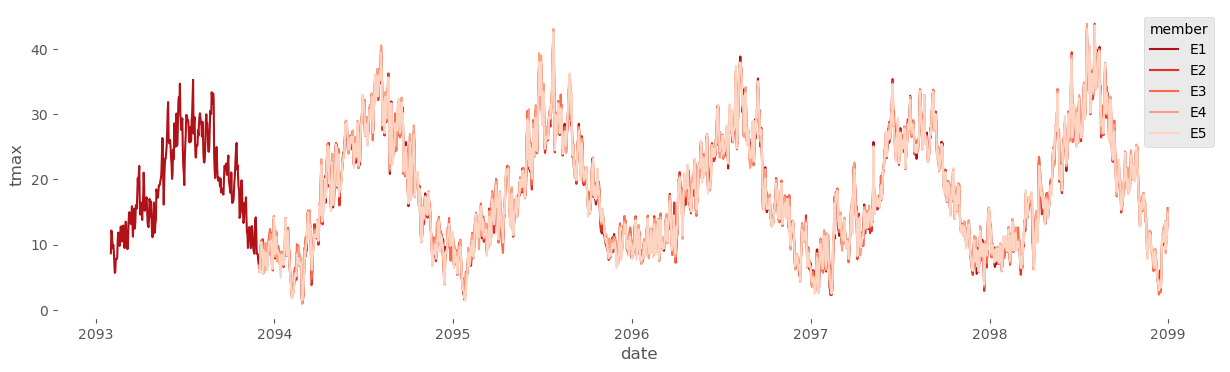

In [94]:
plt.style.use("ggplot")
plt.figure(figsize=(15,4))
p = sns.lineplot(x="date", y="tmax",hue="member",data=data,errorbar=("pi", 100),palette="Reds_r")
p.set_facecolor("white")

In [87]:
ICON_data.sel(lat=slice(45,55),lon=slice(5,10)).mean(dim=["lat","lon"])

<xarray.DataArray 'tmax' (member: 5, date: 2162)>
array([[      nan,  8.683413, 12.165331, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ..., 12.572976, 14.643449,
              nan],
       [      nan,       nan,       nan, ..., 12.657469, 15.61525 ,
              nan],
       [      nan,       nan,       nan, ..., 13.045618, 15.100163,
              nan],
       [      nan,       nan,       nan, ..., 12.220503, 14.795747,
              nan]], dtype=float32)
Coordinates:
  * date     (date) datetime64[ns] 2093-01-01 2093-02-01 ... 2099-01-01
  * member   (member) <U2 'E1' 'E2' 'E3' 'E4' 'E5'
    year     (date) int64 2093 2093 2093 2093 2093 ... 2098 2098 2098 2098 2099
    yday     (date) int64 1 32 33 34 35 36 37 38 ... 360 361 362 363 364 365 1

In [7]:
dat = ICON_data.sel(lat=slice(45,55),lon=slice(5,10)).mean(dim=["lat","lon"])
dat["week"] = dat.date.dt.weekofyear
dat["year"] = dat.date.dt.year

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/accessor_dt.py:407: FutureWarning: dt.weekofyear and dt.week have been deprecated. Please use dt.isocalendar().week instead.
  warnings.warn(


In [25]:
members = dat.member.values
range(members)

TypeError: only integer scalar arrays can be converted to a scalar index

In [111]:
def mannwhit_spatial_rweekly(data):
    data["week"] = data.date.dt.weekofyear
    data["year"] = data.date.dt.year
    weeks = np.unique(data.week)
    members = data.member.values
    #data_year = data.sel(year = year)
    # Apply Mann-Whitney U test across ensemble pairs for each lat/lon
    dims = ("member", "week")
    coords = {
        "member": range(len(members)),  # 5 elements
        "week": range(len(weeks))  # 54 elements
    }
    
    # Create an empty DataArray
    p_values = xr.DataArray(np.empty((5, 54)), dims=dims, coords=coords)  # Placeholder for p-values

    
    
    for i,m in enumerate(members):
        for j,w in enumerate(weeks): 
            
    
    for i in range(len(lat)):
        for j in range(len(lon)):
            # Extract data for the grid point (i, j) across ensemble members
            values = data_year[:, i, j].values
            
            # Pairwise comparisons
            for k in range(len(files)):
                for l in range(k + 1, len(files)):
                    u_stat, p_val = mannwhitneyu(values[k], values[l], alternative='two-sided',nan_policy="omit")
                    
                    # Store the smallest p-value (or other metric)
                    if np.isnan(p_values[i, j]) or p_val < p_values[i, j]:
                        p_values[i, j] = p_val
                        if p_val < 1:
                            print(p_val)
    
    # Mask non-significant results
    significant_mask = p_values < 0.05
    return p_values,significant_mask

SyntaxError: expected ':' (30458275.py, line 13)